<a href="https://colab.research.google.com/github/wayamhui/ISYS5002ELP/blob/main/ISYS5002_ELP_Q4_(WaYam_Hui_20486978).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#	State the problem clearly: 
1. The item to solve is to calucate maximun profits country and minimum profits country as well as average country profits for Australia+Oceania Region based on the sales data provided.
2. Plot the Australia+Oceania Region profit by country in a bar chart

# Describe the input and output: 
1. input: the sales cvs file provided
2. outout: max, min, average, and a bar chart as stated previously.


#Work a simple example by hand

This to manually calculate the average profit for "Australia and Oceania" manually to check the program later

Australia and Oceania profit records 369155
60418.38
147031.74
337937.6
146875.14
727423.2
13009.18
5270.67
1678540.98
285087.64
951410.5
The avarege country profits in Australia and Oceania region is 429287.2755

(note: after working on the codes, it is found that the above manual calculation is not so correct.  Anyway, it is for initial brain-storming purpose)

In [94]:
(369155 + 60418.38  + 147031.74  + 337937.6  + 146875.14  + + 727423.2  + 13009.18  + 5270.67  + 1678540.98  + 285087.64  + 951410.5 )/11



429287.2754545454

# Develop an algorithm and Convert to Python actual development of the software coding


The most difficult part of this program is to sum up the different records' profit for same country.  In the csv, one country can have idfferent sale items and have multiple records.  

However, the requirement is to calculate the max/min/average of a country's profit, NOT a item's profit, for "Australia and Oceania" Region

So, we **must aggregate** the same country's profit, i.e. one record only for one country, and create another datafile/dataframe!

Note: this task requirement is quite prescriptive and there is no free-style user input required, but just a pre-set CSV file.  As a result, I do not use function ( def xxx ) as there is no much need to freqently call a same function to out put result.

In [95]:
csvname = '/content/sales.csv'  # This is the only input needed for this task: Set filename variable value after upload the actual csv file to colab

In [96]:
import csv  # importing the csv module to read the csv files
file = open(csvname, newline='')
reader = csv.reader(file)

header = next(reader) 
print (header)

data=[]

for row in reader:  

  Region	 = (row[0])
  Country	 = (row[1])
  ItemType = (row[2])
  SalesChannel = (row[3])
  OrderPriority = (row[4])
  OrderDate = (row[5])
  OrderID = (row[6])
  ShipDate = (row[7])
  UnitsSold = float(row[8])
  UnitPrice = float(row[9])
  UnitCost = float(row[10])
  TotalRevenue = float(row[11])
  TotalCost = float(row[12])
  TotalProfit = float(row[13])
  data.append([Region, Country, ItemType, SalesChannel, OrderPriority, OrderDate, OrderID, ShipDate, UnitsSold, UnitPrice, UnitCost, TotalRevenue, TotalCost, TotalProfit])  # remember use square bracket

'''All data are read and stored in a list called "data". Some pieces of info might not be needed,
but for completeness purpose, it is decided to read from cvs and write all data to our LIST
'''
print (data[1][13])  # total profit is stored in the 14th (13 in the code means 14th) column of each row/record. 
            # This is to output the 2nd record's (1 in the code means 2nd) profit for random sample check.
print( type (data[0]))
print( len(data) )  # check total number of records in the csv file.


['Region', 'Country', 'Item Type', 'Sales Channel', 'Order Priority', 'Order Date', 'Order ID', 'Ship Date', 'Units Sold', 'Unit Price', 'Unit Cost', 'Total Revenue', 'Total Cost', 'Total Profit']
248406.36
<class 'list'>
100


In [97]:
# This session of coding is the most critial piece of the whole program, as highlighted previous regarding the most difficult part. 

countrycount = 0  # Initializaion. This variable is for reconciling purpose only: should be same as len(countries) 
countries = []   # this is the list to store the DISTINCT countries names
countrybase = []  # this is the list to store the profit of the first item (only) of each country
addprofit = []   # this is the list to store the profit of 2nd and onwards itmes of each country
tempprofit = 0

for i in range(0,len(data)):
  
 
  if data[i][0] == "Australia and Oceania":
    temp = data[i][1]
    #print (temp)
    #print(countries)

    if temp in countries:            # this "if" condition means repeating country in the records, i.e. more than 1 records from same country.
      for j in range(0,len(countries)): 
        if countries[j] == temp:       # this "if" condition means the new item/record's country name is same as some prior record (j)'s country
          tempprofit = data[i][13]
          addprofit.append ([j, tempprofit]) # j is to mark down the sequence number of the country (i.e. poistion in the DISTINCT countries list), 
                             # for any additional items/profits. Please note j can be repeated if a country has 3 or more items.  

    else:
      #print ("no")
      countries.append(temp)      # temp is the country name, only distinct one will be added in the countries list
      countrybase.append(data[i][13])  # this is the record the first item's profit of each country.
      countrycount += 1


data = []    # this will be the final data to be stored in new dataframe, and for bar chart plotting.

accumprofit = 0   # initialization of accumulated profits

for i in range(0,len(countries)):
  
  accumprofit = countrybase[i]
  
  for j in range (0,len(addprofit)):   # to add all additional items profits back to the corresponding country.
    if addprofit[j][0] == i:
      accumprofit += addprofit[j][1]  # when the (0) first column result of (j+1)th row of addprofit equals i, the all the profits stored in addprofit list will belong to country/countries i.

  data.append([countries[i], accumprofit])  # accumulated profit by country is done and stored now.
    
#print ((countries))
print (addprofit)  # print to check 
print (data)    # print to check 


  

[[5, 60418.38], [5, 147031.74]]
[['Tuvalu', 951410.5], ['Solomon Islands', 285087.64], ['East Timor', 337937.6], ['New Zealand', 5270.67], ['Kiribati', 13009.18], ['Australia', 576605.12], ['Fiji', 727423.2], ['Federated States of Micronesia', 146875.14], ['Samoa ', 1678540.98]]


In [98]:
# This session to do calculation max, min and average.

sum = 0
ma = data[0][1]  # max temporarily assigned to first record for initialization
mi = data[0][1]  # min temporarily assigned to first record for initialization

for i in range(0,len(data)):
  sum += data[i][1]
  if data[i][1] > ma:  # if current record is higher than old max, then it takes over
    ma = data[i][1]
    macountry = countries[i]
  if data[i][1] < mi:  # if current record is lower than old min, then it takes over
    mi = data[i][1]
    micountry = countries[i]

avgprofit = sum / countrycount

print(mi, avgprofit, ma)
# rework the manual calculation using the updated no. of unique countries of 9:
(369155 + 60418.38  + 147031.74  + 337937.6  + 146875.14  + + 727423.2  + 13009.18  + 5270.67  + 1678540.98  + 285087.64  + 951410.5 )/9

# result matches the program's output of the average profit amount.

5270.67 524684.4477777778 1678540.98


524684.4477777777

In [99]:
# This session writes the accumulate/aggregate profit by country to new datafile.

regioncsvname = '/content/ausioceanprofit.csv'

with open(regioncsvname,'w') as f:
    f.writelines("Region,Country,Aggregate Profit")
    #

    f.writelines("\n")

    for i in range(0,len(data)):       
            
      temp1 = ( "Australia and Oceania," + str(data[i][0]) + "," + str(data[i][1]) )                 
      
      f.writelines(temp1)
      f.writelines("\n")  
f.close()

In [100]:
import pandas as pd

data = pd.read_csv(regioncsvname)   # using pandas to read the newly created data for accumulate/aggregate profit

data.head(1)
data.tail()

print (data.head(10))  # print to check
print (type(data.head(1)))
print (type(data))


# help (data.head)



                  Region                         Country  Aggregate Profit
0  Australia and Oceania                          Tuvalu         951410.50
1  Australia and Oceania                 Solomon Islands         285087.64
2  Australia and Oceania                      East Timor         337937.60
3  Australia and Oceania                     New Zealand           5270.67
4  Australia and Oceania                        Kiribati          13009.18
5  Australia and Oceania                       Australia         576605.12
6  Australia and Oceania                            Fiji         727423.20
7  Australia and Oceania  Federated States of Micronesia         146875.14
8  Australia and Oceania                          Samoa         1678540.98
<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.frame.DataFrame'>


# Testing: as this task requirement is quite prescriptive, there is no need to test various data in terms of input/output, but only simple debug is done.

Text(0.5, 1.0, 'Australia and Oceania')

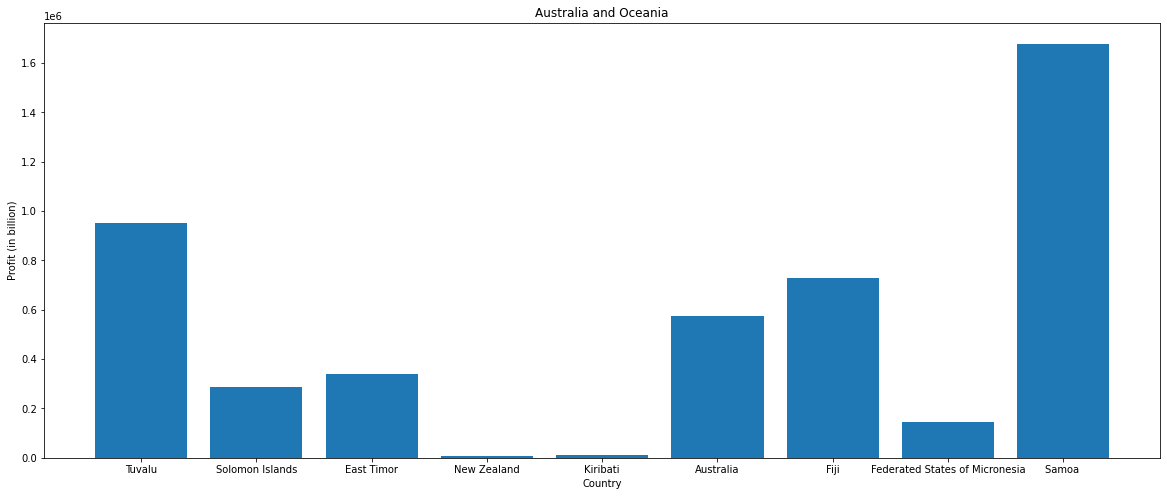

In [101]:
# plot 

import matplotlib.pyplot as plt

plt.figure(figsize=(20,8))

plt.bar(data["Country"], data["Aggregate Profit"])

plt.xlabel("Country")
plt.ylabel("Profit (in billion)")
plt.title("Australia and Oceania")


In [102]:
# output key summary
print ("The average profit per country for Region Australia+Oceania is : ",avgprofit)
print ("The minimum profit is from country",micountry,": ",mi)
print ("The maximum profit is from country",macountry,": ",ma)
print ("Thanks for using my program, bye.")


The average profit per country for Region Australia+Oceania is :  524684.4477777778
The minimum profit is from country New Zealand :  5270.67
The maximum profit is from country Samoa  :  1678540.98
Thanks for using my program, bye.
